In [29]:
import numpy as np
import os
import pandas as pd
from matplotlib import pyplot as plt
import math
import colorsys
from skimage import color
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

import sklearn.cluster as cluster

try:
    os.chdir("/Users/ryan/Dropbox/1_proj/logos/")
except:
    os.chdir("/media/ryan/hdd/Dropbox/1_proj/logos/")

In [30]:
logo_colors = pd.read_csv("data/colors_erosion-char_higher_fixed.csv")

In [31]:
colors = logo_colors.loc[:,['r','g','b']]
norm_colors = colors/255.
hsv_colors = np.vstack(norm_colors.apply(lambda x: colorsys.rgb_to_hsv(x[0],x[1],x[2]), axis=1))
nonbw = hsv_colors[np.asarray(np.bitwise_and(np.sum(colors, axis=1)>30, np.sum(colors, axis=1)<720)),:]

## Doing the clustering:

/Users/ryan/anaconda3/envs/clusterenv/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


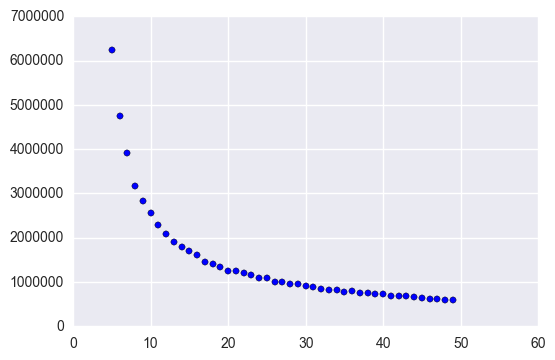

In [32]:
warnings.filterwarnings("ignore", category=DeprecationWarning) 
inertia = []
for i in np.arange(5,50):
    color_clusters = cluster.MiniBatchKMeans(n_clusters=i, batch_size=10000)
    color_clusters.fit(colors)
    inertia = np.append(inertia, color_clusters.inertia_)

plt.scatter(np.arange(5,50), inertia)

In [40]:
color_clusters = cluster.KMeans(init="k-means++", n_clusters=14)
good_fit = color_clusters.fit_predict(colors)

In [41]:
rgbcenters = color_clusters.cluster_centers_/256.

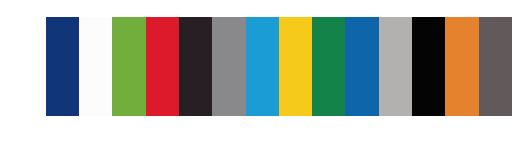

In [42]:
plt.axis('off')
plt.imshow([rgbcenters, rgbcenters, rgbcenters], interpolation='nearest')

The problem with all of this is that we are clustering colors in computer space. Our goal is to come up with a dictionary that is human meaningful. That should imply that we cluster in "human" space. 

The LAB color system is designed for using distances that are human meaningful. 

In [43]:
rgb_matrix = colors.as_matrix()/255.

In [44]:
lab_colors = np.apply_along_axis(lambda x: color.rgb2lab([[[x[0],x[1],x[2]]]]).flatten(), 1, rgb_matrix)

In [45]:
lab_colors

array([[  1.52448515e+01,   3.70061561e+01,  -4.85872128e+01],
       [  9.96421727e+01,   2.44813997e-02,  -5.27452581e-02],
       [  6.39222187e+01,   1.06083283e+00,  -3.15912496e+00],
       ..., 
       [  3.26367216e+01,   1.28702930e+00,  -3.52280126e+01],
       [  7.28507757e+01,  -1.91750182e+01,  -2.01435111e+01],
       [  9.99006802e+01,  -3.37509749e-02,  -4.70900955e-02]])

/Users/ryan/anaconda3/envs/clusterenv/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


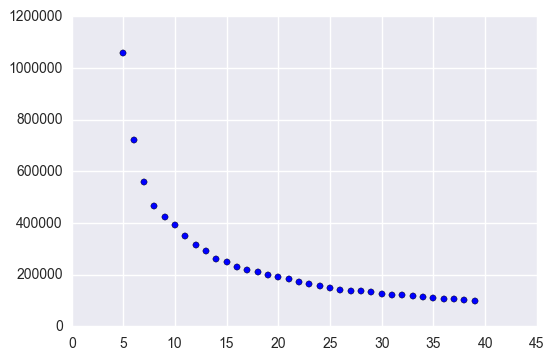

In [46]:
warnings.filterwarnings("ignore", category=DeprecationWarning) 
lab_inertia = []
for i in np.arange(5,40):
    lab_clusters = cluster.KMeans(init="k-means++", n_clusters=i)
    lab_clusters.fit(lab_colors)
    lab_inertia = np.append(lab_inertia, lab_clusters.inertia_)

plt.scatter(np.arange(5,40), lab_inertia)

array([729, 339, 192, 201,  52,  48, 155,  93, 221, 106,  58,  55,  36,  43])

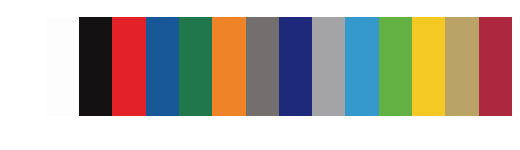

In [50]:
lab_clusters = cluster.KMeans(init="k-means++", n_clusters=14)
good_lab_fit = lab_clusters.fit_predict(lab_colors)

lab2rgb_centers = np.apply_along_axis(lambda x: color.lab2rgb([[[x[0],x[1],x[2]]]]).flatten(), 1, 
                                      lab_clusters.cluster_centers_)

plt.axis('off')
plt.imshow([lab2rgb_centers, lab2rgb_centers, lab2rgb_centers], interpolation='nearest')
np.bincount(good_lab_fit)

Compare this to what we had before:

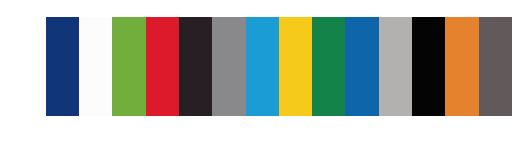

In [51]:
plt.axis('off')
plt.imshow([rgbcenters, rgbcenters, rgbcenters], interpolation='nearest')

Actually, they're not that different...

Oh well, the LAB is a more pleasing idea and it eliminates one shade of grey.

In [52]:
np.savetxt("data/lab_centers_14.csv", lab2rgb_centers, delimiter=',') 

In [53]:
logo_colors['color_label'] = good_lab_fit
logo_colors

,name,area,frac,r,g,b,color_label
0,21st-century-fox,5939,0.121303,40.472470,16.636134,109.001515,7
1,21st-century-fox,36168,0.738725,253.966462,253.950758,254.075011,0
2,21st-century-fox,6853,0.139971,154.165037,154.467824,160.454983,8
3,3m,35045,0.523216,237.617178,29.291682,37.266315,2
4,3m,31935,0.476784,254.856302,253.221105,253.284265,0
5,abbott-labs,4531,0.102326,1.311410,150.069080,215.018318,9
6,abbott-labs,34734,0.784417,254.302499,254.526429,254.630880,0
7,abbott-labs,4173,0.094241,2.889049,2.889049,2.889049,1
8,abbott-labs,842,0.019015,139.399050,164.022565,176.038005,8
9,abbvie-inc,46609,0.202994,21.235212,59.518419,116.491643,3


In [54]:
logo_colors.to_csv("data/colors_erosion-char_higher_fixed_lab.csv")